# Measuring the Josephson Current, the gap voltage and the normal state resistance at 857ohm 
** **
 * This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following line to install lmfit
#!pip install lmfit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import math

## Data

In [3]:
#Load the data
df = pd.read_csv("./Data/857_one_pass.csv", sep = " ", header = None)

#Preview the data
df.head()

,0,1,2
0,8.241,63.2811,0.00320
1,8.128,61.7796,0.00312
2,7.916,60.4399,0.00306
3,7.746,58.7071,0.00297
4,7.549,57.3510,0.00290


## Data wrangling

In [4]:
#Ascribe the columns to the V and I varibles 
V = list(df[0])
I = list(df[1])

#Preview the data
print("V = ", V)
print("I = ", I )

V =  [8.241, 8.128, 7.916, 7.746, 7.549, 7.323, 7.153, 6.955, 6.758, 6.588, 6.391, 6.207, 6.045, 5.84, 5.642, 5.487, 5.338, 5.141, 4.957, 4.788, 4.632, 4.449, 4.307, 4.124, 3.968, 3.771, 3.644, 3.439, 3.305, 2.923, 2.881, 2.853, 2.86, 2.839, 2.839, 2.839, 2.81, 2.825, 2.81, 2.796, 2.782, 2.782, 2.782, 2.754, 2.754, 2.74, 2.683, 0.113, 0.099, 0.113, 0.127, 0.12, 0.085, 0.12, 0.099, 0.113, -2.563, -2.577, -2.577, -2.592, -2.584, -2.613, -2.62, -2.62, -2.641, -2.676, -2.93, -3.128, -3.326, -3.495, -3.679, -3.834, -4.018, -4.187, -4.385, -4.533, -4.724, -4.908, -5.084, -5.289, -5.458, -5.649, -5.854, -6.037, -6.235, -6.468, -6.652, -6.878, -7.033, -7.259, -7.485, -7.669, -7.895, -7.782, -7.457, -7.146, -6.835, -6.489, -6.186, -5.854, -5.557, -5.204, -4.936, -4.618, -4.385, -4.089, -3.785, -3.524, -3.241, -2.747, -2.719, -2.662, -2.676, -2.662, -2.655, -2.627, -2.62, -2.592, -2.577, -2.535, 0.064, 0.042, 0.057, 0.057, 0.064, 0.057, 2.754, 2.74, 2.754, 2.775, 2.796, 2.825, 3.164, 3.474, 3.72

In [5]:
#Function that returns the index of the last occurrence of an item in a list
def find_last_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            last_occurrence = i
    return last_occurrence

lower_limit = find_last_occurrence(0.057, V)
upper_limit = V.index(5.635)

print(lower_limit)
print(upper_limit)

125
141


In [6]:
#Remove the data above the chosen upper limit to enhance the view and focus on the single forward pass
V = np.array(V[lower_limit:upper_limit])

I = np.array(I[lower_limit:upper_limit])

#Preview the new subsets
print("V = ", V)
print("I = ", I)

V =  [0.057 2.754 2.74  2.754 2.775 2.796 2.825 3.164 3.474 3.728 4.011 4.223
 4.548 4.773 5.021 5.338]
I =  [ 9.2489 10.85   13.0186 14.694  16.7208 18.6281 20.942  22.9217 24.8898
 26.8537 29.1227 31.4366 33.4838 35.6238 38.0018 40.3751]


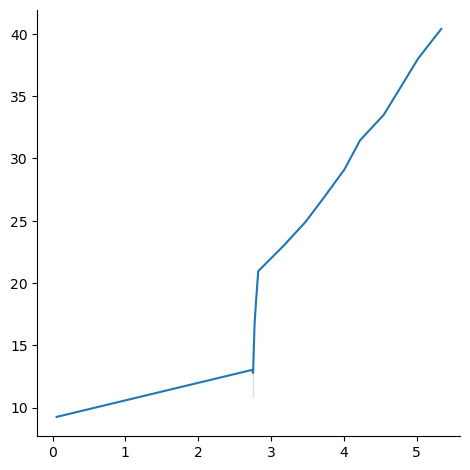

In [7]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Preview the data
sns.relplot(x = V, y = I, kind = "line")

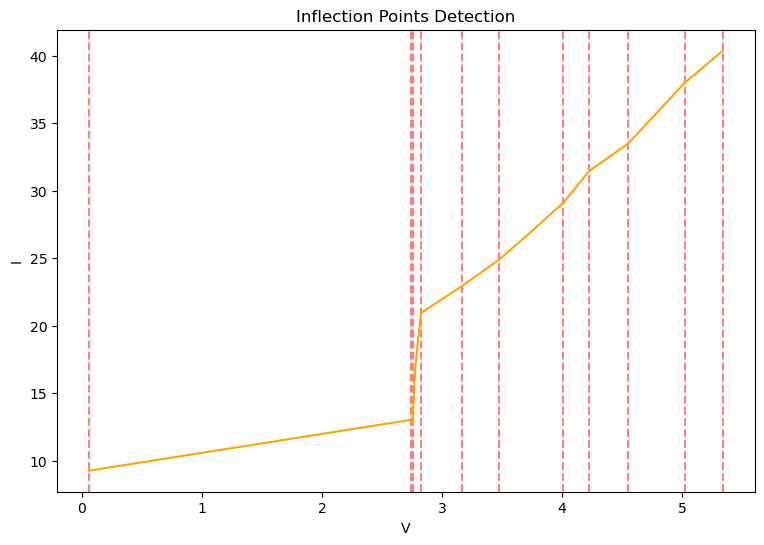

In [8]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the data
V = np.array(V)
I = np.array(I)


# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.1:
        change_points.append(i)

# Mark the change points on the plot
for point in change_points:
    plt.axvline(V[point], color='r', linestyle='--', alpha=0.5)

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

### Clear the graph above to focus on Ic and Vc

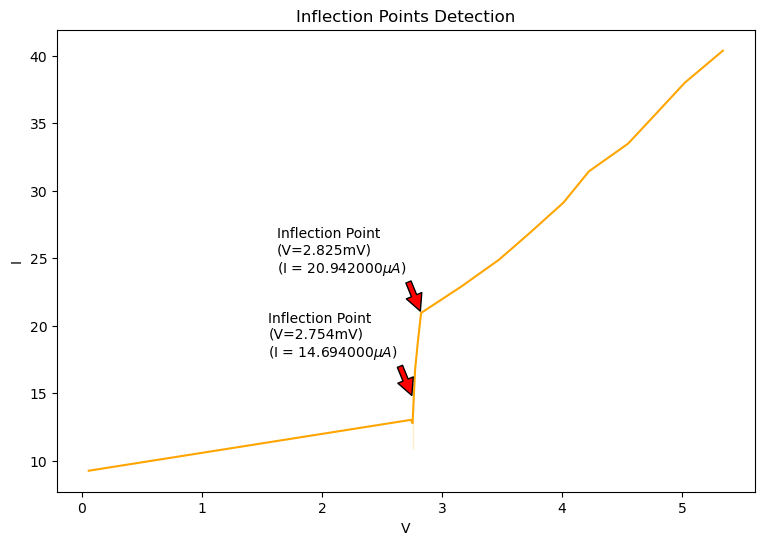

In [9]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.1:
        change_points.append(i)

# Annotate inflection points on the graph
for idx, point in enumerate(change_points):
    if idx in [1, 3]:
        plt.annotate(f'Inflection Point\n(V={V[point]:.3f}mV)\n(I = {np.interp(V[point], V, I):3f}$\mu A$)', 
                     xy=(V[point], np.interp(V[point], V, I)),
                     xytext=(V[point] - 1.2, np.interp(V[point], V, I) + 3),
                     arrowprops={'facecolor': 'red', 'shrink': 0.05})

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

# Estimating the normal state resistance (Rn)

In [10]:
#Preview the main dataset
print(list(df[0]))

[8.241, 8.128, 7.916, 7.746, 7.549, 7.323, 7.153, 6.955, 6.758, 6.588, 6.391, 6.207, 6.045, 5.84, 5.642, 5.487, 5.338, 5.141, 4.957, 4.788, 4.632, 4.449, 4.307, 4.124, 3.968, 3.771, 3.644, 3.439, 3.305, 2.923, 2.881, 2.853, 2.86, 2.839, 2.839, 2.839, 2.81, 2.825, 2.81, 2.796, 2.782, 2.782, 2.782, 2.754, 2.754, 2.74, 2.683, 0.113, 0.099, 0.113, 0.127, 0.12, 0.085, 0.12, 0.099, 0.113, -2.563, -2.577, -2.577, -2.592, -2.584, -2.613, -2.62, -2.62, -2.641, -2.676, -2.93, -3.128, -3.326, -3.495, -3.679, -3.834, -4.018, -4.187, -4.385, -4.533, -4.724, -4.908, -5.084, -5.289, -5.458, -5.649, -5.854, -6.037, -6.235, -6.468, -6.652, -6.878, -7.033, -7.259, -7.485, -7.669, -7.895, -7.782, -7.457, -7.146, -6.835, -6.489, -6.186, -5.854, -5.557, -5.204, -4.936, -4.618, -4.385, -4.089, -3.785, -3.524, -3.241, -2.747, -2.719, -2.662, -2.676, -2.662, -2.655, -2.627, -2.62, -2.592, -2.577, -2.535, 0.064, 0.042, 0.057, 0.057, 0.064, 0.057, 2.754, 2.74, 2.754, 2.775, 2.796, 2.825, 3.164, 3.474, 3.728, 4.

In [11]:
#The dataset includes points from two complete sweeps
#Identify the index of the approximate limits of the normal state on the positive side of the graph 

#Function the returns the index of the last occurrence of an item in a list
def find_last_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            last_occurrence = i
    return last_occurrence

low_limit = find_last_occurrence(2.825, list(df[0])) #the second change point above
up_limit = list(df[0]).index(df[0][len(df[0]) -1]) 

print(low_limit) 
print(up_limit)

131
148


In [12]:
#Select data from the first pass
V_n = np.array(df[0][low_limit:up_limit])
I_n = np.array(df[1][low_limit:up_limit])

#Preview the data
print(V_n)
print(I_n)

[2.825 3.164 3.474 3.728 4.011 4.223 4.548 4.773 5.021 5.338 5.635 5.932
 6.186 6.461 6.758 7.083 7.365]
[20.942  22.9217 24.8898 26.8537 29.1227 31.4366 33.4838 35.6238 38.0018
 40.3751 42.3527 44.6967 46.8687 49.4726 51.5327 54.0506 56.6668]


## Define the model and fit the data

In [13]:
#Define the variables and convert to Volts and Amps
x = V_n / 0.001
y = I_n / 0.000001

#Use builtin NameModel, specify prefix for each:
mod = LinearModel(prefix='') 

#Set the initial parameters to 'guess' mode
pars  = mod.guess(y, x = x)

#Fit with weights=1/yerr
result = mod.fit(y, pars, x = x, weights= 1. / (y * 0.01338))

#Print the fit results
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 17
    # variables        = 2
    chi-square         = 15.0100651
    reduced chi-square = 1.00067101
    Akaike info crit   = 1.88362986
    Bayesian info crit = 3.55005654
    R-squared          = 1.00000000
[[Variables]]
    slope:      7917.63573 +/- 86.3398233 (1.09%) (init = 7999.924)
    intercept: -2134106.30 +/- 385584.459 (18.07%) (init = -2523626)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9599


## Plot the model

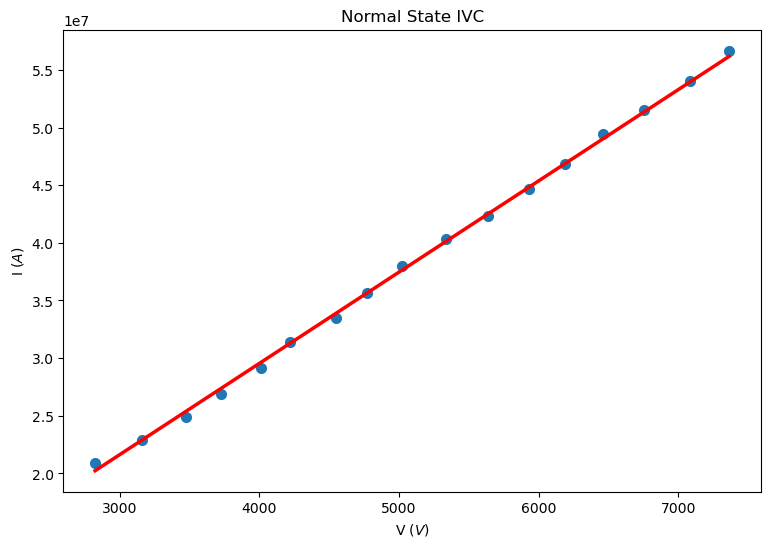

In [14]:
#Set the figure size
plt.figure(figsize = (9,6))

#Plot the data and the model
plt.scatter(x, y, linewidth=2)
plt.plot(x, result.best_fit, 'r-', linewidth=2.5)

# Set plot labels and title
plt.xlabel('V ($V$)')
plt.ylabel('I ($A$)')
plt.title('Normal State IVC')

#Show the plot
plt.show()

# Calculating the theoretical Ic and V_gap

![](./img/Ic_formula.png)

In [15]:
#Access the model parameters
varys = result.params.valuesdict()

varys

{'slope': 7917.6357300121335, 'intercept': -2134106.2959812526}

In [16]:
#The slope is equal to 1 / R 
R_n = 1 / varys.get("slope")

print('Normal state resistance: R_n = ', round(R_n, 6), 'Ohm') 

Normal state resistance: R_n =  0.000126 Ohm


In [17]:
#Define the terms for the strong and weak coupling formulas 
t_c = 9.25 #critical temperature
delta_0 = 2.25288819E-22 # from 1.764 * k_B * t_c,  [check eqn. 1 on the report paper] 
t = 5.3699797 #from the calibration curve in notebook 2
e = 1.6022E-19 #elementay charge
pi = 3.14159265358979323846264338327950 
t_red = t / t_c #the reduced temperature
k_B = 1.3807E-23 #Boltzmann constant
R_n = 1 / varys.get("slope") #from the slope of the IVC


#weak coupling formula

delta_weak = delta_0 * 1.74 * math.sqrt(1.0 - t_red)

E_weak = delta_weak * 2

V_weak = (E_weak / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_weak = (pi / 2) * (delta_weak / (e * R_n)) * math.tanh(delta_weak / (2 * k_B * t))


#strong coupling approximation

delta_strong = (delta_0) * math.sqrt(math.cos((pi * t_red**2)  / 2 )) 

E_strong = delta_strong * 2

V_strong = (E_strong / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_strong = (pi / 2) * (delta_strong / (e * R_n)) * math.tanh(delta_strong / (2 * k_B * t))


#Print the results
print('Temperature =', t, 'K')
print('-----------------------------')
print('-----------------------------')
                         
print('Weak Coupling Formula')
print('-----------------------------')


print('delta_t =', delta_weak, 'J')
print('Gap Energy =', E_weak, 'J')
print('Gap Voltage =', V_weak, 'mV')
print('Josephson Current =', Ic_weak, 'uA')
print('______________________________')
print('______________________________')
print('------------------------------')
print('Strong Coupling Approximation')
print('------------------------------')

print('delta_t =', delta_strong, 'J')
print('Gap Energy = ', E_strong, 'J')
print('Gap Voltage =', V_strong, 'mV')
print('Josephson Current =', Ic_strong, 'uA')
print('________________________________')
print('________________________________')
print('________________________________')

Temperature = 5.3699797 K
-----------------------------
-----------------------------
Weak Coupling Formula
-----------------------------
delta_t = 2.538838170787176e-22 J
Gap Energy = 5.077676341574352e-22 J
Gap Voltage = 3.169190077127919 mV
Josephson Current = 18.46417788509801 uA
______________________________
______________________________
------------------------------
Strong Coupling Approximation
------------------------------
delta_t = 2.093018746962774e-22 J
Gap Energy =  4.186037493925548e-22 J
Gap Voltage = 2.6126809973321357 mV
Josephson Current = 14.424130321488244 uA
________________________________
________________________________
________________________________


In [18]:
#Add all the collected results to a dictionary
Josephson_data = {"Ic" : np.interp(V[6], V, I) , "Ic_weak" : round(Ic_weak, 4), "Ic_strong" : round(Ic_strong, 4), "V_gap" : V[1], "Vg_weak" : round(V_weak, 4), "Vg_strong" : round(V_strong, 4), "Temp" : round(t, 4)}

#Preview the newly created row of data
print(Josephson_data)

{'Ic': 20.942, 'Ic_weak': 18.4642, 'Ic_strong': 14.4241, 'V_gap': 2.754, 'Vg_weak': 3.1692, 'Vg_strong': 2.6127, 'Temp': 5.37}


## Export the results to a csv file

In [19]:
# import csv

# with open(r'./Data/Josephson_data.csv', 'a', newline='') as csvfile:
#     fieldnames = ['Ic','Ic_weak', 'Ic_strong', 'V_gap', 'Vg_weak', 'Vg_strong', 'Temp']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

#     writer.writerow(Josephson_data)

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>